Vector spaces -- treat signals as vectors; scaling and summing

Utility functions
1. delta(k, n): returns a vector of length k which is zero everywhere but 1 at n
2. unit_step(k, n): returns a vector of length k which is zero for index < n and 1 for index >= n
3. unit_pulse(k, n_1, n_2): 1 for index between n_1 and n_2 (both inclusive)
4. sin_x(k, n, N)
5. ramp(k, n)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
def gen_sig_delta(length, n):
    signal_d = np.zeros(length)
    if n >= 0 & n < length:
        signal_d[n] = 1
    return signal_d

def gen_sig_unit_step(length, n):
    signal_us = np.zeros(length)
    if n >= 0 & n < length:
        signal_us[n:] = 1
    return signal_us

def gen_sig_unit_pulse(length, n_1, n_2):
    signal_us = np.zeros(length)
    if n_1 > n_2:
        n_1, n_2 = n_2, n_1
    if n_1 >= 0 & n_2+1 < length:
        signal_us[n_1:n_2+1] = 1
    return signal_us

def gen_sig_sin(length, n, N):
    signal_sin = np.zeros(length)
    omega = 2 * np.pi * n / N
    for k in range(length):
        signal_sin[k] = np.sin(omega * k)
    return signal_sin

def gen_sig_cos(length, n, N):
    signal_cos = np.zeros(length)
    omega = 2 * np.pi * n / N
    for k in range(length):
        signal_cos[k] = np.cos(omega * k)
    return signal_cos

def gen_sig_chirp_sin(length, n, N):
    signal_sin = np.zeros(length)
    omega = 2 * np.pi * n / N
    for k in range(length):
        signal_sin[k] = np.sin(omega * n * k)
    return signal_sin

def gen_sig_chirp_cos(length, n, N):
    signal_cos = np.zeros(length)
    omega = 2 * np.pi * n / N
    for k in range(length):
        signal_cos[k] = np.cos(omega * n * k)
    return signal_cos


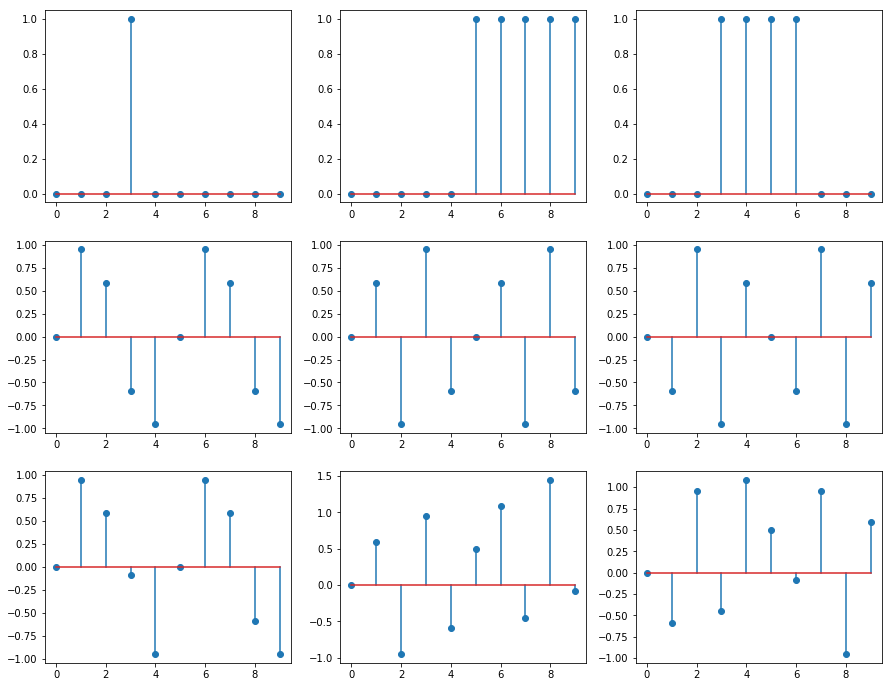

In [23]:
d3 = gen_sig_delta(10, 3)
u5 = gen_sig_unit_step(10, 5)
u36 = gen_sig_unit_pulse(10, 3, 6)
s151 = gen_sig_sin(10, 1, 5, 1)
s152 = gen_sig_sin(10, 1, 5, 2)
s153 = gen_sig_sin(10, 1, 5, 3)

fig, ax = plt.subplots(3, 3, figsize = (15, 12))
ax[0][0].stem(d3)
ax[0][1].stem(u5)
ax[0][2].stem(u36)
ax[1][0].stem(s151)
ax[1][1].stem(s152)
ax[1][2].stem(s153)

# next, we scale the delta & unit signals and add to the sin waves
sd = s151 + 0.5 * d3
sus = s152 + 0.5 * u5
sups = s153 + 0.5 * u36

ax[2][0].stem(sd)
ax[2][1].stem(sus)
ax[2][2].stem(sups)
plt.show()

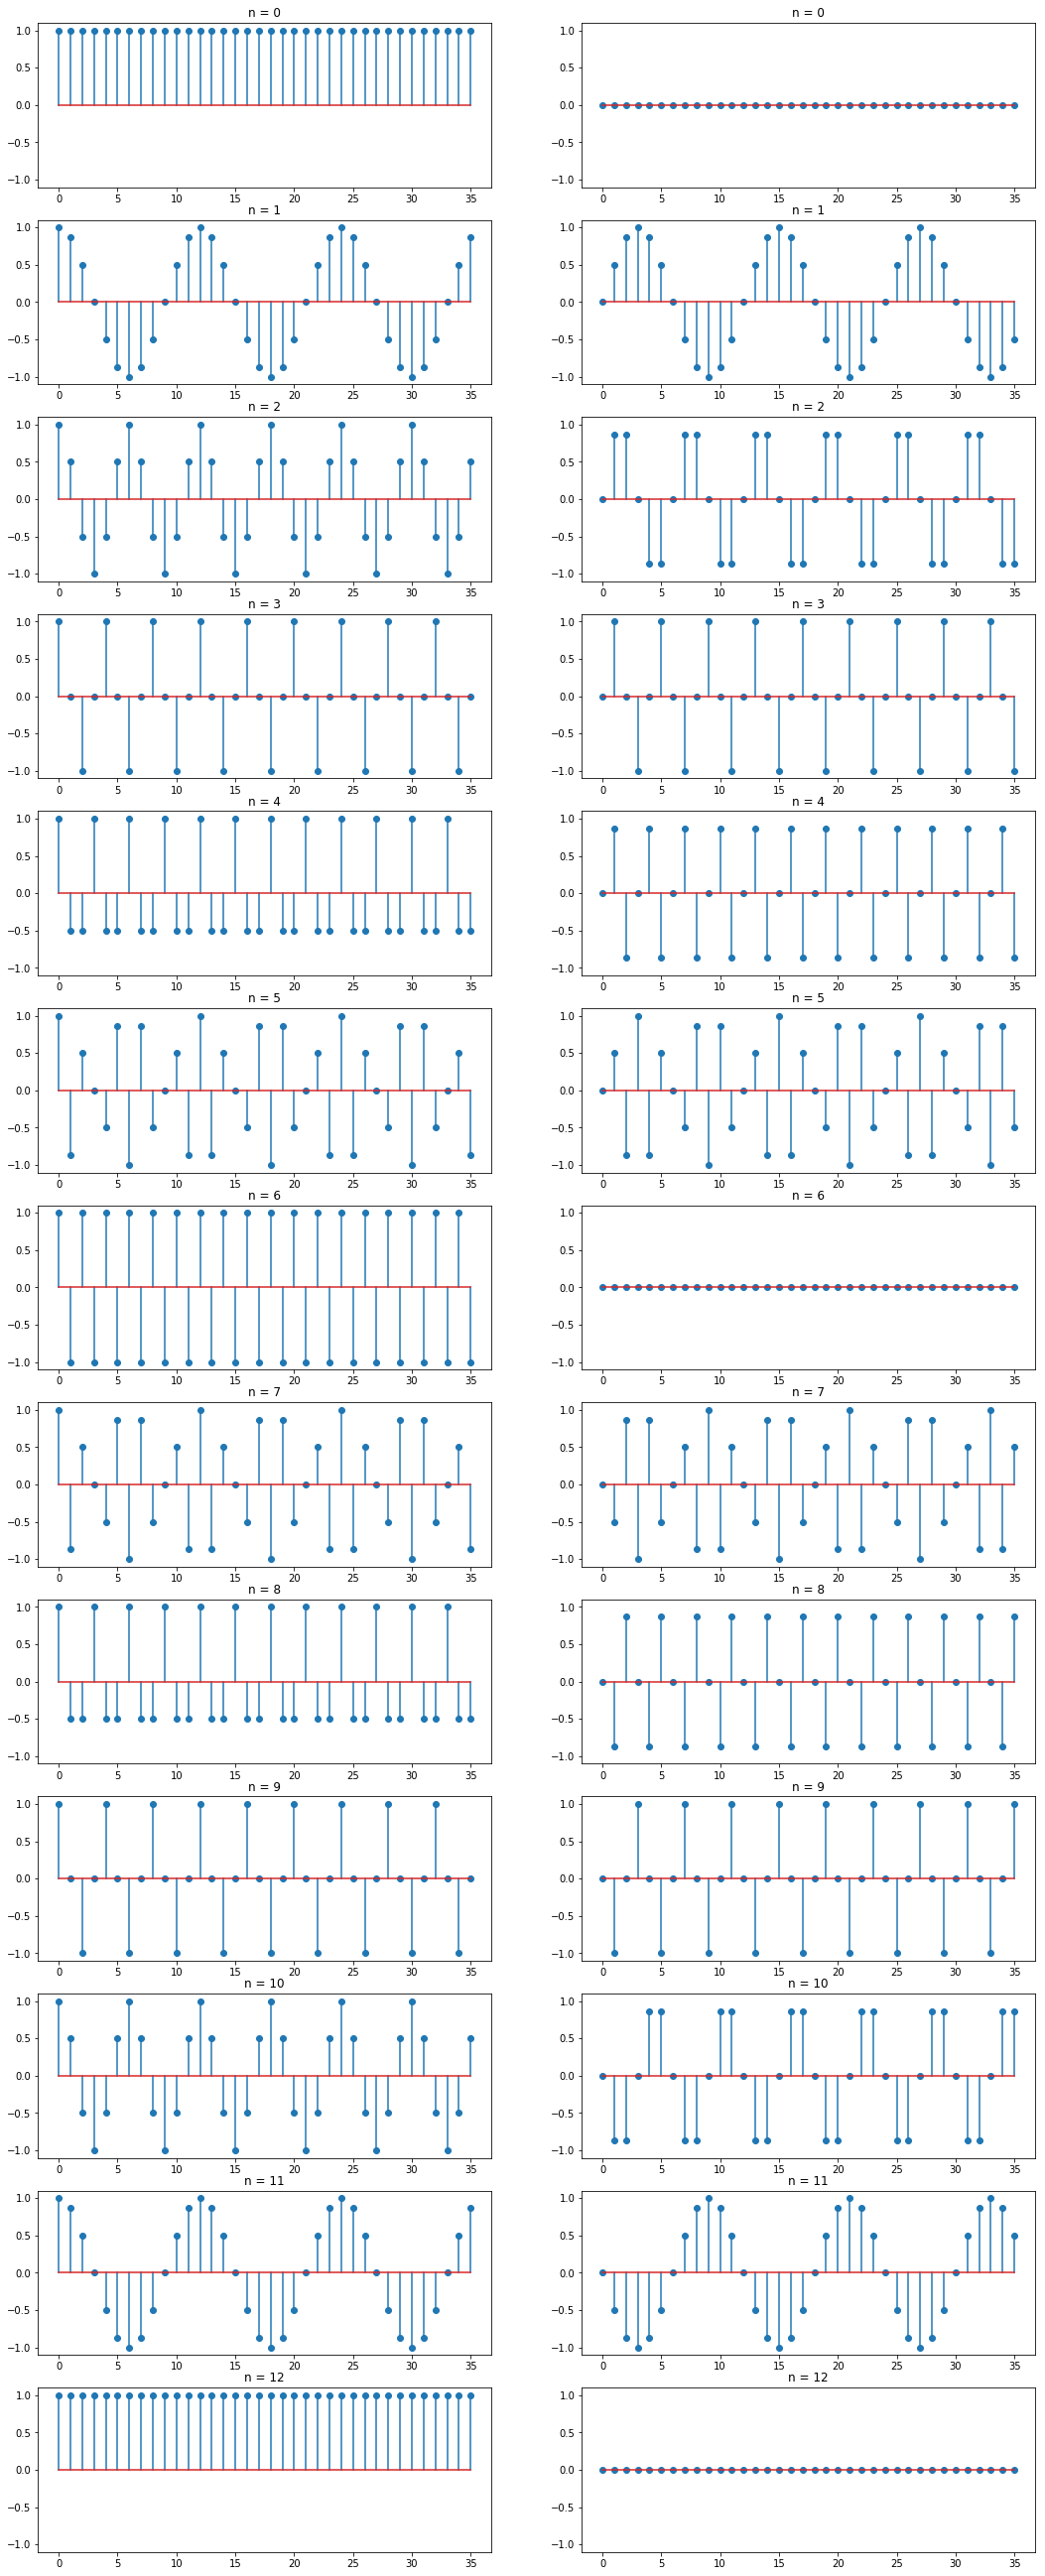

In [64]:
N = 12
Np1 = N + 1
npts = 3 * N

fig, ax = plt.subplots(Np1, 2, figsize = (18, 24))
plt.subplots_adjust(top=1.6)
for n in range(Np1):
    title = "n = " + str(n)
    ax[n][0].stem(gen_sig_cos(npts, n, N))
    ax[n][0].set_title(title)
    ax[n][0].set_ylim(-1.1,1.1)
    
    ax[n][1].stem(gen_sig_sin(npts, n, N))
    ax[n][1].set_title(title)
    ax[n][1].set_ylim(-1.1,1.1)
plt.show()

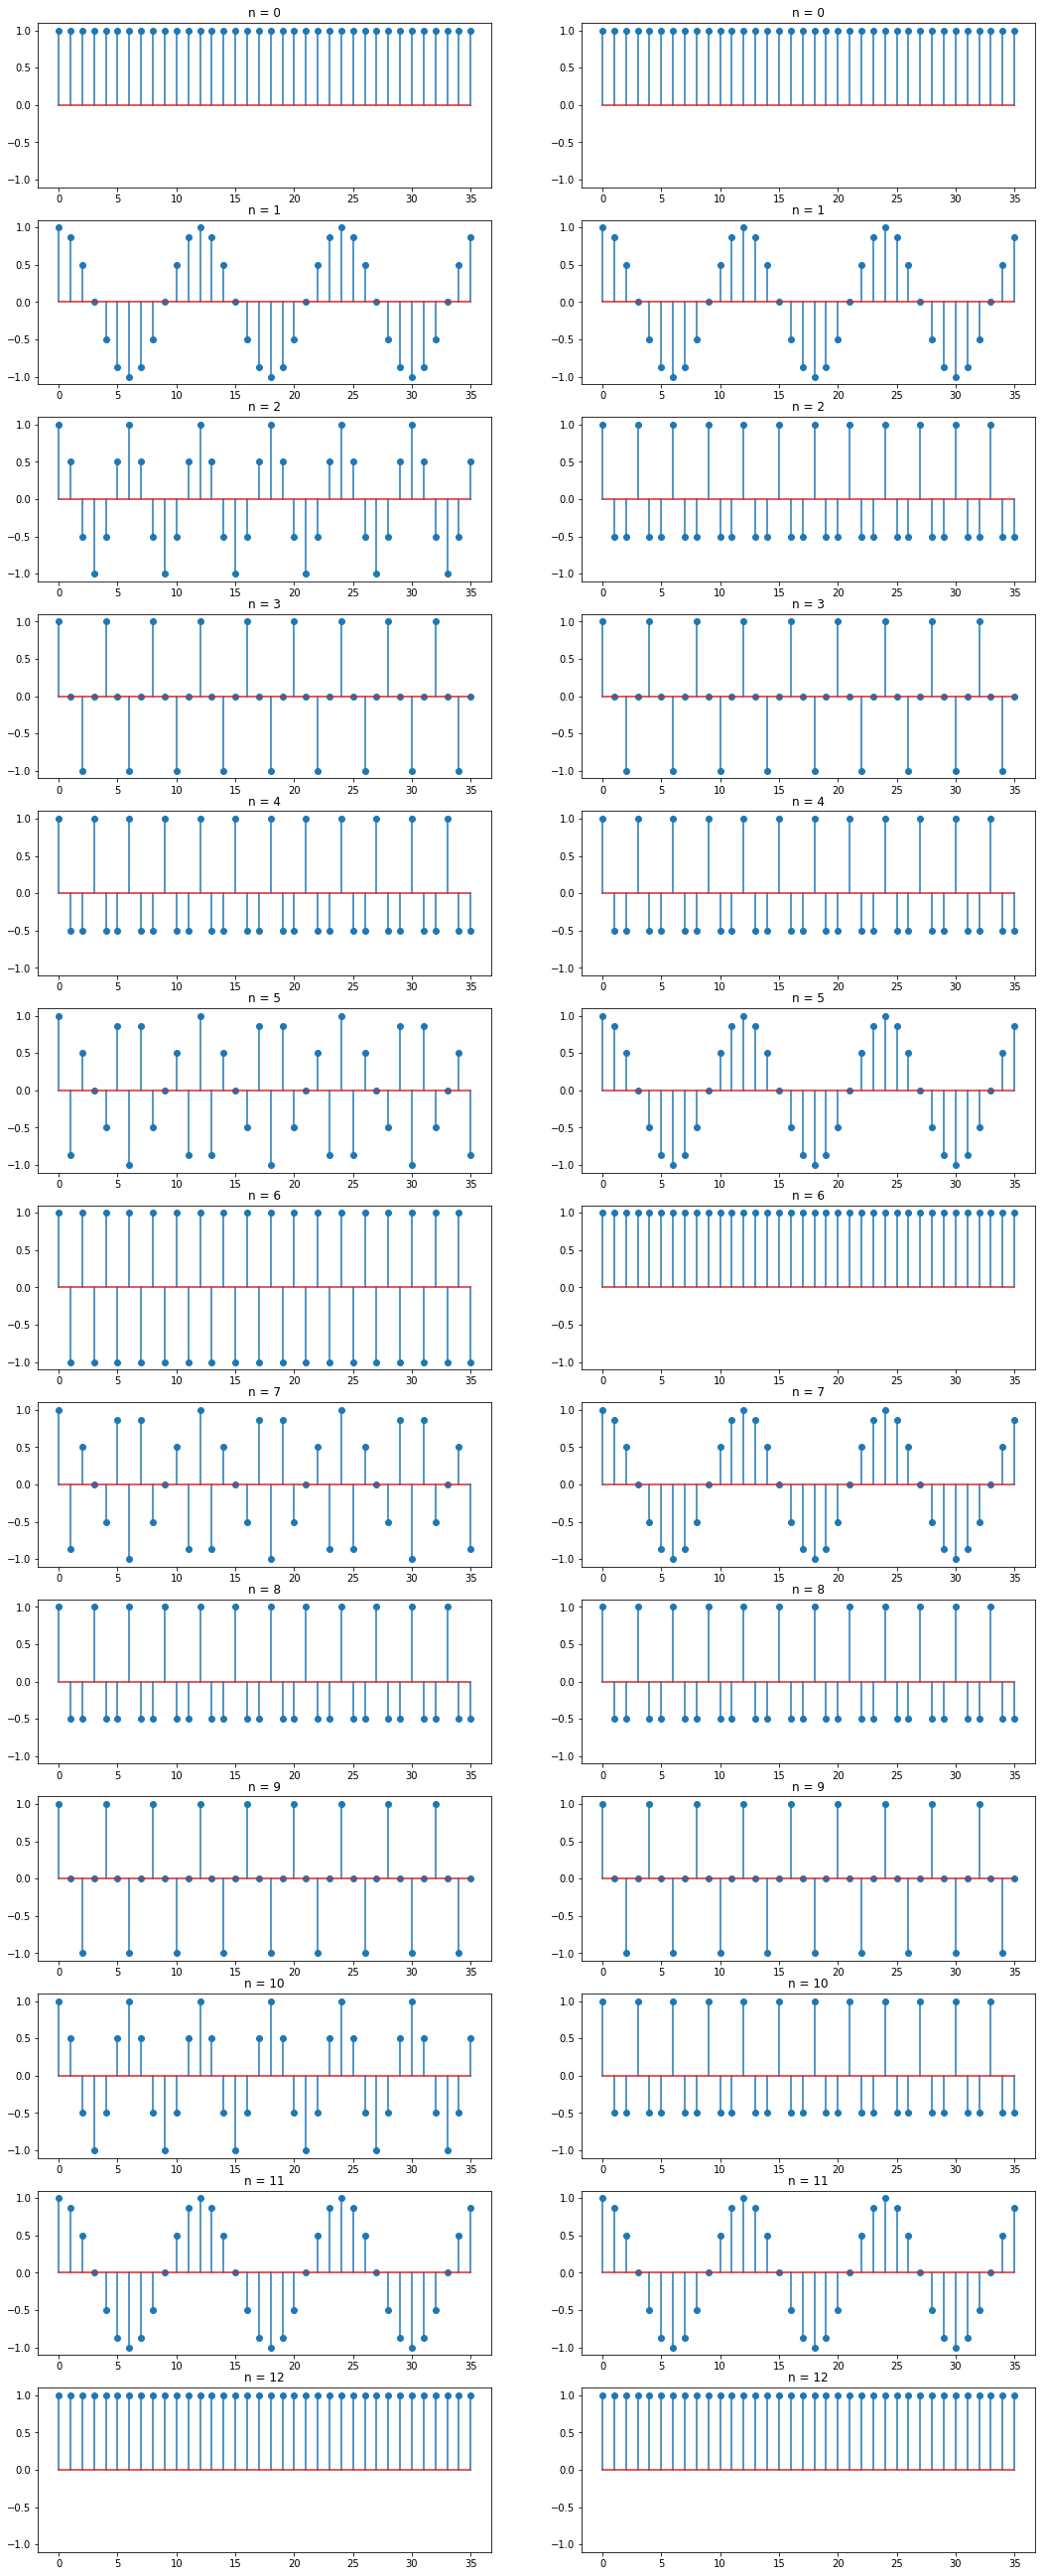

In [65]:
N = 12
Np1 = N + 1
npts = 3 * N

fig, ax = plt.subplots(Np1, 2, figsize = (18, 24))
plt.subplots_adjust(top=1.6)
for n in range(Np1):
    title = "n = " + str(n)
    ax[n][0].stem(gen_sig_cos(npts, n, N))
    ax[n][0].set_title(title)
    ax[n][0].set_ylim(-1.1,1.1)
    
    ax[n][1].stem(gen_sig_chirp_cos(npts, n, N))
    ax[n][1].set_title(title)
    ax[n][1].set_ylim(-1.1,1.1)
plt.show()

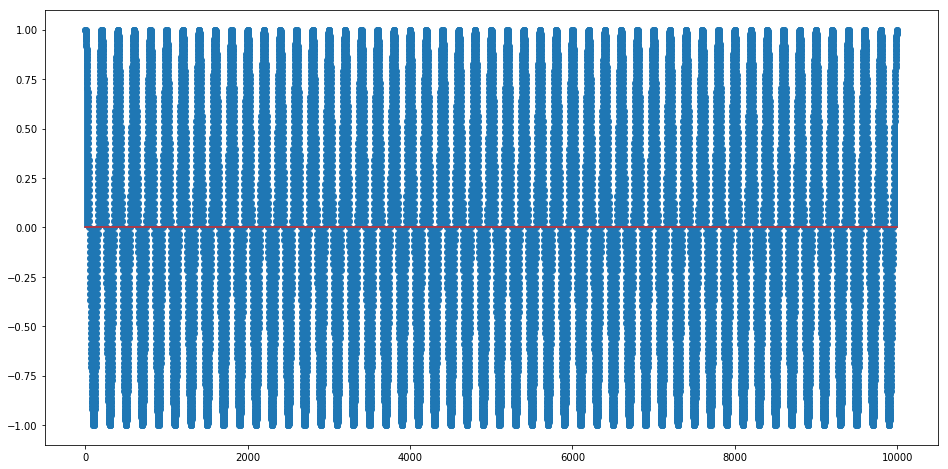

In [87]:
N = 200
npts = 10000
n = 1
#chirp = gen_sig_chirp_cos(npts, 2, N)
chirp = np.zeros(npts)
omega = 2 * np.pi * n / N
for k in range(npts):
    chirp[k] = np.cos(omega * k)
figs, ax = plt.subplots(1, 1, figsize = (16, 8))
ax.stem(chirp)
plt.show()

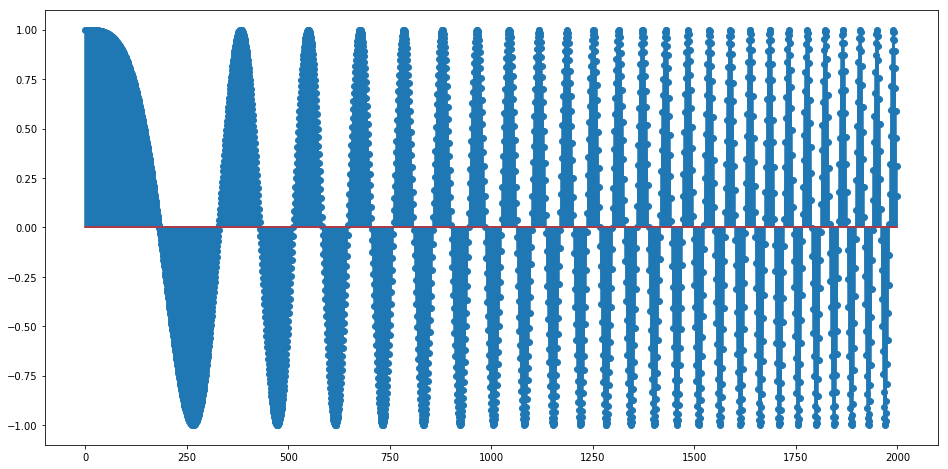

In [108]:
N = 4000
npts = 2000
n = 1.
#chirp = gen_sig_chirp_cos(npts, 2, N)
chirp = np.zeros(npts)

t = np.array(range(npts))
f0 = n/N
f1 = 100./N
t1 = npts
beta = (f1 - f0)/t1
phase = 2 * np.pi * (f0 * t + 0.5 * beta * t * t)

omega = 2 * np.pi / N
for k in range(npts):
    omega *= n
    n = n + .8
    chirp[k] = np.cos(phase[k])
figs, ax = plt.subplots(1, 1, figsize = (16, 8))
ax.stem(chirp)
plt.show()

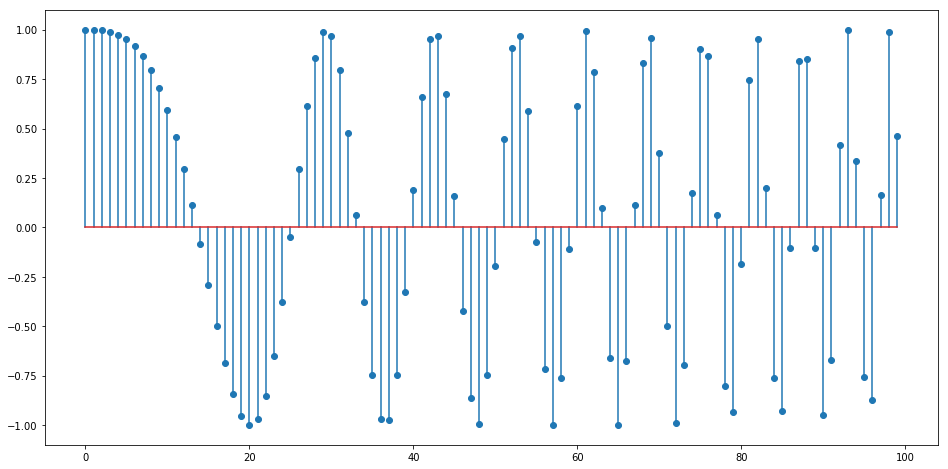

In [91]:
import scipy.signal as ss

N = 200
npts = 100
n = 1
#chirp = gen_sig_chirp_cos(npts, 2, N)

y = ss.chirp(range(npts), 1./200, 200, 80./200, method='linear')


figs, ax = plt.subplots(1, 1, figsize = (16, 8))
ax.stem(y)
plt.show()

Very cool: all sinusoids are orthogonal to each other. Generate the matlab done in w2.5 @ 7:40